# Tutorial 2

## Exercice 1 : Vague cosinusoïdale

### a) x(t) = 5 cos(628t)

#### i. Période

In [1]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
period = (2 * np.pi) / 628
print(f"T = {period} s")

T = 0.010005072145190424 s


#### ii. Fréquence

In [3]:
frequency = 1 / period
print(f"f = {frequency} Hertz")

f = 99.94930426171027 Hertz


#### iii. Fréquence angulaire (rad/s)

In [4]:
angular_frequency = 2 * np.pi * frequency
print(f"w = {angular_frequency} rad/s")

w = 628.0 rad/s


#### iv. Magnitude

In [5]:
x = np.linspace(0, 10, 10)
y = 5 * np.cos(628 * x)
magnitude = max(y)
print(f"Magnitude = {magnitude}")

Magnitude = 5.0


#### v. Phase
Il n'y a aucune phase : il s'agit d'un cosinus.

### b) Échantillonnage à F<sub>s</sub> = 1kHz pendant 10 secondes

#### i. Longueur du signal

In [6]:
fs = 1000
samples = fs * 10
print(f"Nombre d'échantillons = {samples}")

Nombre d'échantillons = 10000


#### ii. Construiction de l'axe temporel

In [7]:
x = np.linspace(0, 10, samples)

#### iii. Affichage du signal

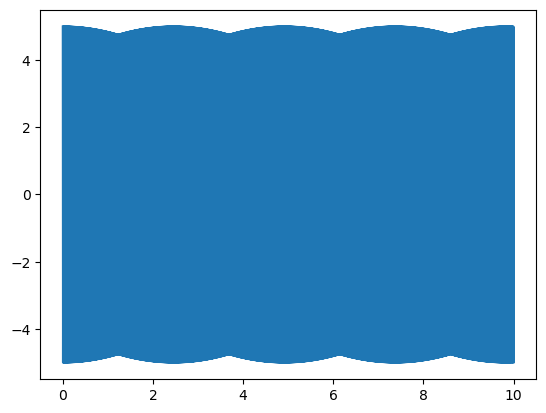

In [8]:
y = 5 * np.cos(628 * x)
plt.plot(x, y)
plt.show()

#### iv. Comparaison de la fréquence

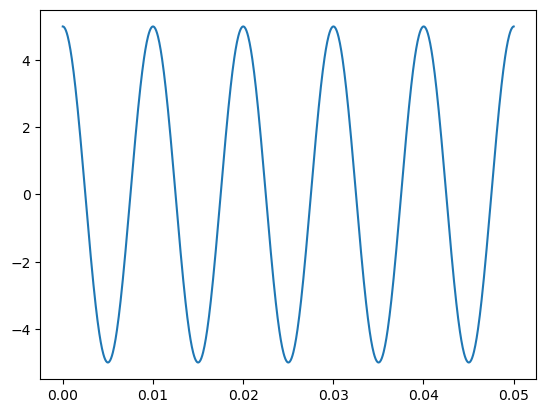

In [9]:
x2 = np.linspace(0, 0.05, 1000)
y2 = 5 * np.cos(628 * x2)
plt.plot(x2, y2)
plt.show()

On retrouve bien T ≈ 0.01s, donc f ≈ 100Hz.

### c) Analyse dans le domaine fréquentiel

#### i. Résolution fréquentielle Δf

In [10]:
frequency_resolution = fs / samples
print(f"Δf = {frequency_resolution} Hz")

Δf = 0.1 Hz


#### ii. Transformée de Fourrier discrète

In [11]:
def discrete_fourrier_transform(signal, fs):
    time_axis = [i*frequency_resolution for i in range(fs * 10)]
    
    xks = []
    for k in range(fs * 10):
        xk = sum( [signal[i] * np.exp(-2*np.pi*1j*i*k/(fs*10)) for i in range(fs*10)] )
        xks.append(xk)
    return xks, time_axis

#### iii. Parties réelle et imaginaire

In [12]:
dft, ax = discrete_fourrier_transform(y, fs)

In [13]:
dft_r = []
dft_i = []
for i in range(len(dft)):
    dft_r.append(abs(dft[i].real))
    dft_i.append(abs(dft[i].imag))

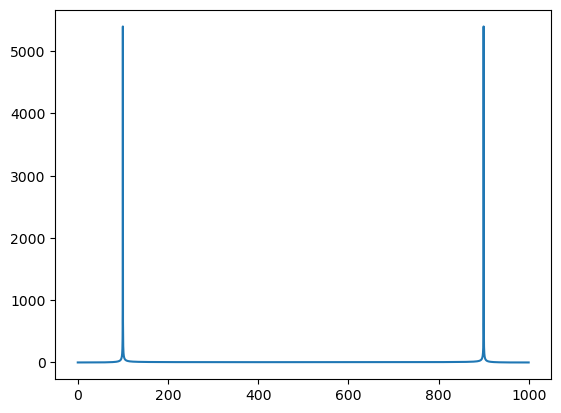

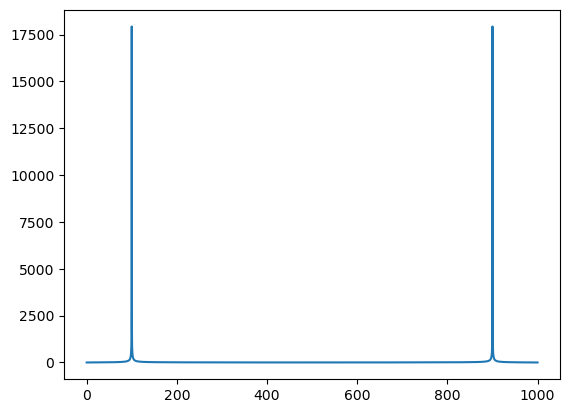

In [14]:
plt.plot(ax, dft_r)
plt.show()
plt.plot(ax, dft_i)
plt.show()

On observe bien deux pics aux même fréquences, la partie imaginaire ayant une plus grande amplitude. La fréquence fondamentale est bien à 100 Hz, fréquence du signal échantillonné à l'origine.

#### iv et v. Spectre normalisé

In [15]:
dft_r_normalized = [i/samples for i in dft_r]
dft_i_normalized = [i/samples for i in dft_i]

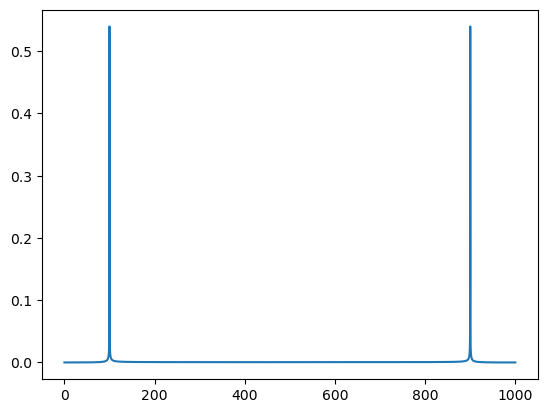

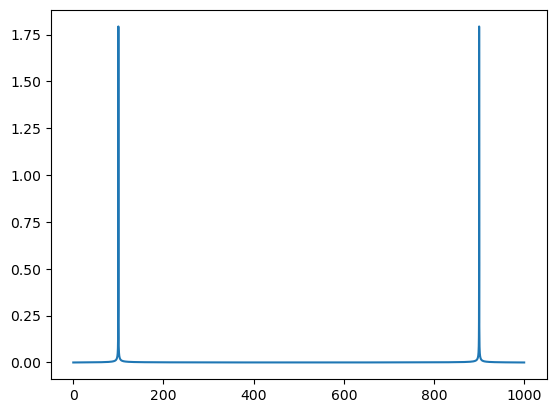

In [16]:
plt.plot(ax, dft_r_normalized)
plt.show()
plt.plot(ax, dft_i_normalized)
plt.show()

Les amplitudes sont proportionnelles à la valeur du signal mais la fréquence demeure la même.

### d. Transformée de Fourrier intégrée

#### i. Calcul des X<sub>k</sub>

In [17]:
fourrier = fft(y)

#### ii. Parties réelle et imaginaire

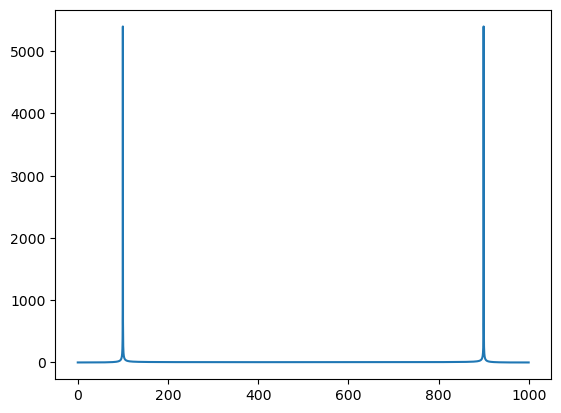

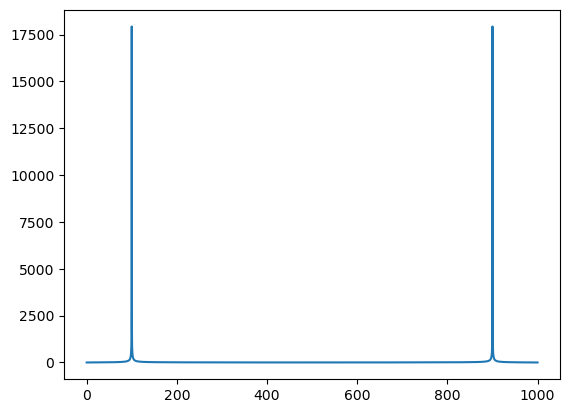

In [18]:
plt.plot(ax, abs(fourrier.real))
plt.show()
plt.plot(ax, abs(fourrier.imag))
plt.show()

#### iii et iv. Spectre normalisé

In [19]:
normalized_spectrum_r = []
normalized_spectrum_i = []
for i in range(len(fourrier)):
    normalized_spectrum_r.append(abs(fourrier[i].real)/samples)
    normalized_spectrum_i.append(abs(fourrier[i].imag)/samples)

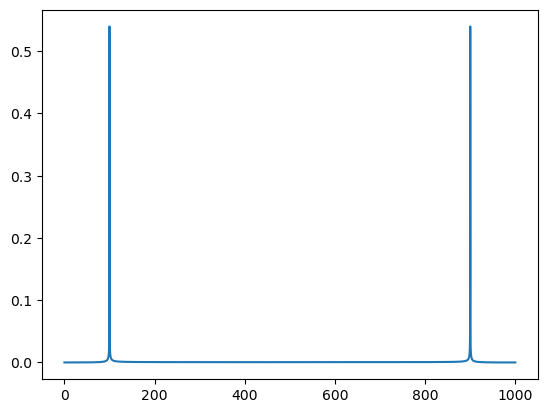

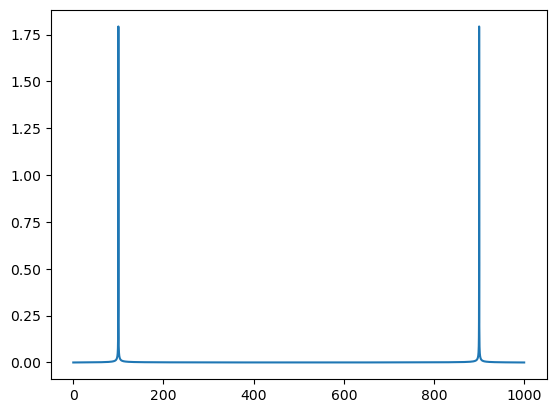

In [20]:
x_fourrier_normalized = np.linspace(0, 1000, samples)
plt.plot(x_fourrier_normalized, normalized_spectrum_r)
plt.show()
plt.plot(x_fourrier_normalized, normalized_spectrum_i)
plt.show()

### e) Signal bruité

#### i. Affichage du signal

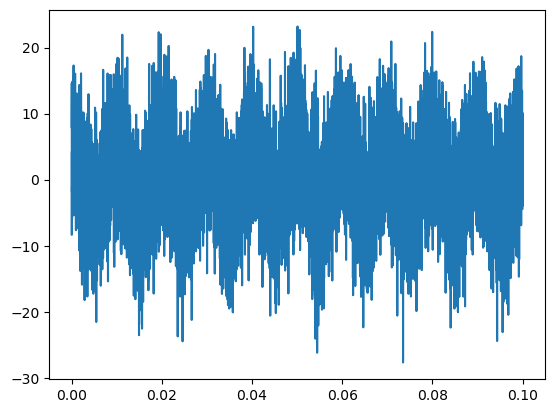

In [21]:
x = np.linspace(0, 0.1, samples)
noise = np.random.normal(0, 6, samples)
y_noised = 5 * np.cos(628 * x) + noise
plt.plot(x, y_noised)
plt.show()

#### ii. Spectre normalisé

In [22]:
noised_specter = fft(y_noised)
noise_normalized_r = []
noise_normalized_i = []
for i in range(len(fourrier)):
    noise_normalized_r.append(abs(noised_specter[i].real)/samples)
    noise_normalized_i.append(abs(noised_specter[i].imag)/samples)

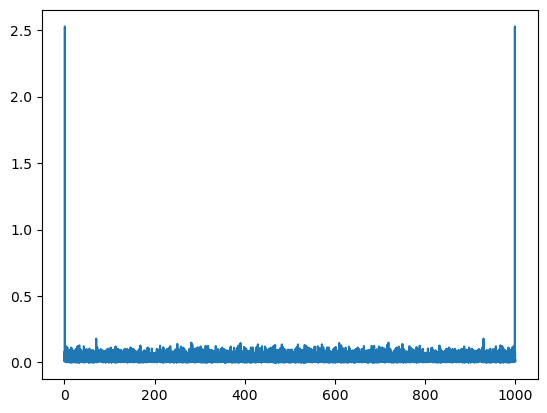

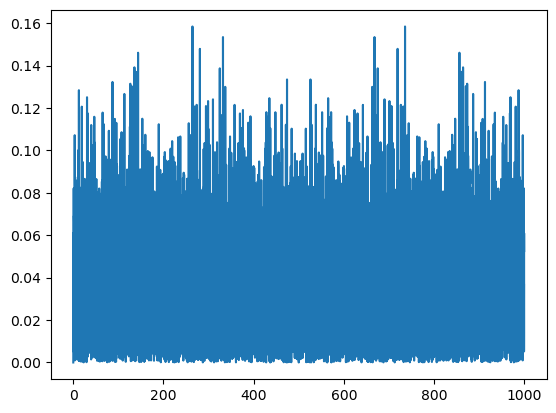

In [23]:
x_fourrier_normalized = np.linspace(0, 1000, samples)
plt.plot(x_fourrier_normalized, noise_normalized_r)
plt.show()
plt.plot(x_fourrier_normalized, noise_normalized_i)
plt.show()

On remarque que le bruit est principalement présent dans la partie imaginaire du spectre, les amplitudes dans la partie réelle étant bien plus importantes.

#### iii. Suffisance d'un demi spectre

Le spectre étant symétrique, une seule moitié du spectre est suffisante.

## Exercice 2 : Analyse de Fourrier de signaux périodiques

### a) Affichage des signaux

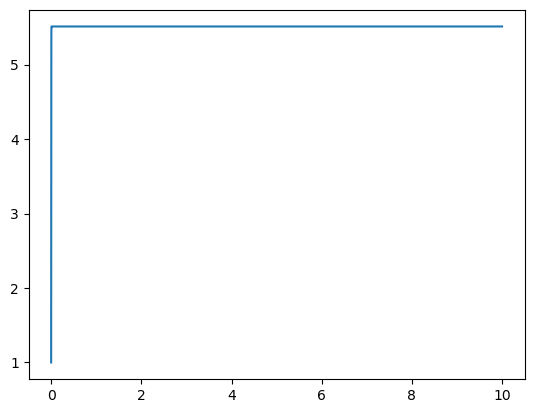

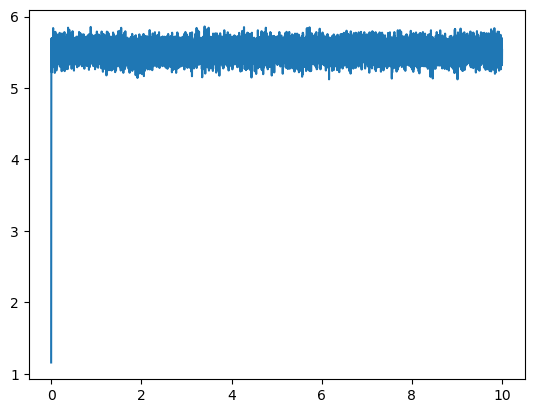

In [24]:
fs = 2000
samples = fs * 10

x = np.linspace(0, 10, samples)
noise = np.random.normal(0, 0.1, samples)

y = [1]
y_noised = [1+noise[0]]
for i in range(1,samples):
    y.append(y[-1] + np.exp(-(x[i]**2)/(2*(0.002**2))))
    y_noised.append(y[-1]+noise[len(y)-1])

plt.plot(x, y)
plt.show()
plt.plot(x, y_noised)
plt.show()

Période :

Fréquence :

### b) Spectre normalisé

### c) Ajout d'une modulation périodique

### d) Fréquence du signal de modulation

### e) Affichage des signaux modulés